In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/creditcard.csv')

# Show the contents
print(df)



       Time        V1        V2        V3        V4        V5        V6  \
0         0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1         0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2         1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3         1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4         2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...     ...       ...       ...       ...       ...       ...       ...   
8761  11926  0.224210  0.730182  0.536568 -0.297833  0.529837  0.008517   
8762  11928 -0.777982  1.247878  1.106014  1.421211 -0.087339  0.044765   
8763  11930  1.297487 -0.202241  0.043946  0.094497 -0.057158  0.099204   
8764  11932 -1.093189  0.157400  2.048652 -0.860421  0.235073 -0.167494   
8765  11932 -2.594443 -0.991587  1.957468  1.705635 -0.182961  0.095771   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  

In [ ]:
%pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix



data = pd.read_csv('/content/creditcard.csv')
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]


# Define the model
model = LogisticRegression()

print(model)



LogisticRegression()


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [ ]:
# Drop rows with missing values in the target variable (y)
y_clean = y.dropna()

# Drop the corresponding rows in the feature matrix (X)
X_clean = X.loc[y_clean.index]

In [ ]:
# Split the cleaned data into train and test sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for train_indices, test_indices in splitter.split(X_clean, y_clean):
    X_train, y_train = X_clean.iloc[train_indices], y_clean.iloc[train_indices]
    X_test, y_test = X_clean.iloc[test_indices], y_clean.iloc[test_indices]


In [ ]:
# Fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate and print the confusion matrix and classification report
cm=confusion_matrix(y_test,y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print('confusion_matrix :')
print(cm)
# And finally: show the results
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion_matrix :
[[9.99801584e-01 1.98416448e-04]
 [3.65482234e-01 6.34517766e-01]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    105838
         1.0       0.86      0.63      0.73       197

    accuracy                           1.00    106035
   macro avg       0.93      0.82      0.86    106035
weighted avg       1.00      1.00      1.00    106035



(142404, 31)


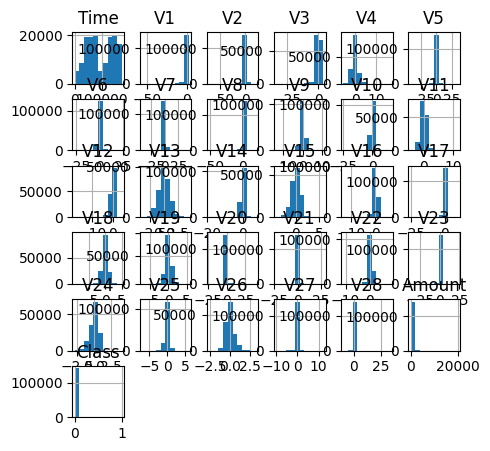

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

# Read the csv file
df = pd.read_csv('creditcard.csv')
df = df.sample( frac = 0.5, random_state = 1 )
print(df.shape)
df.hist(figsize = (5,5 ))
plt.show()





In [ ]:
# Determine the number of fraud cases in the dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print('outlier fraction :',outlier_fraction)
print('number of frauds :', len(Fraud) )
print('number of valid cases :', len(Valid) )

print(Fraud['Class'])


outlier fraction : 0.0015966014193575613
number of frauds : 227
number of valid cases : 142177
235644    1
254344    1
192529    1
176049    1
42769     1
         ..
249607    1
150665    1
53794     1
79874     1
42590     1
Name: Class, Length: 227, dtype: int64


In [ ]:


#Get all the columns from the DataFrame
columns = df.columns.tolist()

#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

#Store the variable we'll be predicting on
target = "Class"

X = df[columns]
Y = df[target]


# Print the shapes of X and Y
print(X.shape)
print(Y.shape)


# define a random state
state = 1

# define the outlier detection methods
classifiers = {
	"Isolation Forest": IsolationForest(max_samples=len(X),
										contamination = outlier_fraction,
										random_state = state),
	"Local Outlier Factor": LocalOutlierFactor(
	n_neighbors = 20,
	contamination = outlier_fraction)
}

# Fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
	# fit the data and tag outliers
	print('Iteration:' , i)
	if clf_name == "Local Outlier Factor":
		y_pred = clf.fit_predict(X)
		print(y_pred)
		scores_pred = clf.negative_outlier_factor_
	else:
		clf.fit(X)
		scores_pred = clf.decision_function(X)
		y_pred = clf.predict(X)

	# Reshape the prediction values to 0 for valid, 1 for fraud
	y_pred[y_pred == 1] = 0
	y_pred[y_pred == -1] = 1
	print('length of array' , len(Y))
	n_errors = (y_pred != Y).sum()

	# Run classification metrics
	#print( df[df['Class'] == 1] )
	print('{}: {}'.format(clf_name, n_errors))
	print(accuracy_score(Y, y_pred))
	cm = confusion_matrix(Y, y_pred)
	cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
	print('confusion matrix : ')
	print(cm)
	print(classification_report(Y, y_pred))

(142404, 30)
(142404,)
Iteration: 0
length of array 142404
Isolation Forest: 321
0.9977458498356788
confusion matrix : 
[[0.99886761 0.00113239]
 [0.70484581 0.29515419]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.29      0.30      0.29       227

    accuracy                           1.00    142404
   macro avg       0.65      0.65      0.65    142404
weighted avg       1.00      1.00      1.00    142404

Iteration: 1
[1 1 1 ... 1 1 1]
length of array 142404
Local Outlier Factor: 439
0.9969172214263644
confusion matrix : 
[[0.99845263 0.00154737]
 [0.96475771 0.03524229]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.04      0.04      0.04       227

    accuracy                           1.00    142404
   macro avg       0.52      0.52      0.52    142404
weighted avg       1.00      1.00      1.00    142404

